In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import tqdm
import pandas as pd
import datetime
import warnings

In [2]:
def snow_depth(df):
    
    df['stake_depth'] = np.nan
    
    df['year'] = [d.year for d in df.index]
      
    years_active = set(df['year'])
    
    for year in years_active:
        
        code = f'{int(NP)}_{year}'
        
        if code in stakes.columns:

            snow = stakes[f'{int(NP)}_{year}']
            
            with warnings.catch_warnings():
                
                warnings.simplefilter("ignore")
        
                for i in snow.index:

                    sd = snow.loc[i]

                    df['stake_depth'].loc[(df['doy']==i) & (df['year']==year)] = sd
                    
        else:
            
            print(f'No snow for {int(NP)}_{year}')
            
def get_wind_height(station,date):
    
    station = int(station)
    
    if station>20:
        height = 10
        
    elif station < 18:
        height = easy_heights[station]
        
    else:
        if station == 18:
            if date < datetime.date(1969,5,1):
                height = 6.4
            elif date >= datetime.date(1969,5,1):
                height = 8.5
            else:
                raise
                
        elif station == 19:
            if date < datetime.date(1970,10,30):
                height = 6.4
            elif (date < datetime.date(1971,1,30)) and (date >= datetime.date(1970,10,30)):
                height = 7.5
            elif (date >= datetime.date(1971,1,30)) and (date < datetime.date(1972,11,30)):
                height = 9.5
            elif date >= datetime.date(1972,11,30):
                height = 12
            else:
                raise
                
        elif station == 20:
            if date < datetime.date(1971,4,30):
                height = 8
            elif date >= datetime.date(1971,4,30):
                height = 6
            else:
                print(NP, date)
                raise
                
        else:
            raise
            
    return height

In [3]:

met_dict = pickle.load(open('met_dict.p','rb'))
stakes = pickle.load(open('/home/robbie/Dropbox/melt_onset_new/pickles/mdf.p','rb'))

In [4]:
frames = []

for NP, df in met_dict.items():
    
    df['doy'] = [d.timetuple().tm_yday for d in df.index]
    
    df['days_after_jan1'] = [d  if d<212 else d-365 for d in df['doy']]
    
    df['diff'] = df['Air temperature'] - df['Surface temperature']
    
    df['NP'] = NP
    
    df[df['diff']<-25] = np.nan
    
    df = df[~np.isnan(df['diff'])]
    
    snow_depth(df)
    
    if np.count_nonzero(np.nan_to_num(df['diff']))>100:
        
        frames.append(df)
        
df = pd.concat(frames)
df['month'] = [x.month for x in df.index]
df = df[np.isin(df['month'],[1,2,3,4,9,10,11,12])]
df['dt'] = df.index

df['code'] = [f'{dt}_{NP}' for dt, NP in zip(df.index,df['NP'])]

easy_heights = {3:8,
            4:8,
           5:6,
           6:8,
           7:10,
           8:8,
           9:8,
           10:6,
           11:8,
           12:10,
           13:6,
           14:8,
           15:6,
           16:10,
           17:10,         
          }



heights = []

for NP, dt in tqdm.tqdm(list(zip(df['NP'],df['dt']))):
    
    date = dt.date()
    
    heights.append(get_wind_height(NP,date))
    
df['wind_height'] = heights

C_D = 1.27e-3
z0 = 1e-3

k = np.sqrt((C_D * np.log(10/z0)**2)/2)

def correct_wind(height,speed):
    
    w = speed * np.log(10/z0)/np.log(height/z0)
    
    return w

winds_corrected = []

for height, speed in zip(df['wind_height'],df['Wind speed']):

    winds_corrected.append( correct_wind(height,speed) )
    
# df.rename(columns={'Wind speed':'Wind_speed'})
    
df['Wind_corrected'] = winds_corrected



df.set_index('code',inplace=True)

df = df[df['Surface temperature']<0]

pickle.dump(df, open('big_df.p','wb'))

/tmp/ipykernel_6895/1498437918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stake_depth'] = np.nan
/tmp/ipykernel_6895/1498437918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = [d.year for d in df.index]
/tmp/ipykernel_6895/1498437918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

No snow for 7_1957
No snow for 7_1958
No snow for 7_1959


/tmp/ipykernel_6895/1498437918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stake_depth'] = np.nan
/tmp/ipykernel_6895/1498437918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = [d.year for d in df.index]
/tmp/ipykernel_6895/1498437918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

No snow for 19_1969


/tmp/ipykernel_6895/1498437918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stake_depth'] = np.nan
/tmp/ipykernel_6895/1498437918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = [d.year for d in df.index]
/tmp/ipykernel_6895/1498437918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

100%|██████████████████████████████| 102650/102650 [00:00<00:00, 2003831.81it/s]


In [10]:
df['NP']

code
1954-09-01 03:00:00_03    03
1954-09-01 09:00:00_03    03
1954-09-01 15:00:00_03    03
1954-09-01 21:00:00_03    03
1954-09-02 03:00:00_03    03
                          ..
1991-03-31 06:00:00_31    31
1991-03-31 09:00:00_31    31
1991-03-31 12:00:00_31    31
1991-03-31 15:00:00_31    31
1991-03-31 18:00:00_31    31
Name: NP, Length: 101780, dtype: object

In [12]:
df_17 = df[df['NP']=='17'].iloc[0]
df_17

Latitude                            85.549
Longitude                          158.976
Air temperature                       -3.7
Relative humidity                     94.0
Sea level pressure                  1009.2
Wind direction                        70.0
Wind speed                             6.0
Total cloudiness                      10.0
Low cloudiness                        10.0
Surface temperature                   -3.0
x                            177521.791976
y                            461881.705594
zenith                           77.509214
doy                                  245.0
days_after_jan1                     -120.0
diff                                  -0.7
NP                                      17
stake_depth                            0.0
year                                  1968
month                                    9
dt                     1968-09-01 00:00:00
wind_height                           10.0
Wind_corrected                         6.0
Name: 1968-

In [6]:
df_10 = df[df['wind_height']==10]

df_10.shape[0],df.shape[0],df_10.shape[0]/df.shape[0]

(74295, 101780, 0.7299567695028493)

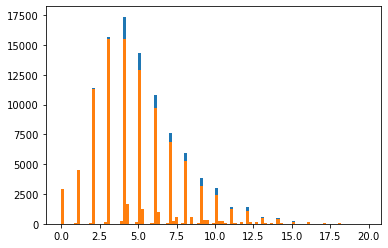

In [5]:
plt.hist(df['Wind speed'],bins=np.arange(0,20,0.2))
plt.hist(df['Wind_corrected'],bins=np.arange(0,20,0.2))
plt.show()

26581 101780 0.2611613283552761
0.16307688106903856
0.12414524560160611


0.9636206312779805

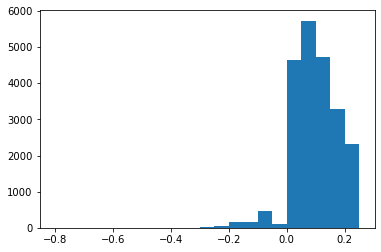

In [6]:
df['wind_correction'] = df['Wind_corrected'] - df['Wind speed']

df_corrected = df[df['wind_height']!=10]

df_corrected = df_corrected[df_corrected['Wind speed']!=0]

print(df_corrected.shape[0], df.shape[0], df_corrected.shape[0] / df.shape[0])

print(np.nanmean(np.abs(df_corrected['wind_correction'])))

plt.hist(df_corrected['wind_correction'],bins=np.arange(-0.8,0.3,0.05))

print(np.nanmedian(np.abs(df_corrected['wind_correction'])))

df_corrected[df_corrected['wind_correction']>0].shape[0]/df_corrected.shape[0]

In [7]:
df_corrected['Wind speed']

code
1954-09-01 03:00:00_03    5.0
1954-09-01 09:00:00_03    5.0
1954-09-01 15:00:00_03    6.0
1954-09-01 21:00:00_03    5.0
1954-09-02 03:00:00_03    2.0
                         ... 
1972-04-29 18:00:00_20    5.0
1972-04-30 00:00:00_20    3.0
1972-04-30 06:00:00_20    2.0
1972-04-30 12:00:00_20    3.0
1972-04-30 18:00:00_20    2.0
Name: Wind speed, Length: 26581, dtype: float64

# Make running means for night_df

In [8]:
df = df[df['zenith']>90]

n=30
day1 = np.min(df['days_after_jan1'])
day_last = np.max(df['days_after_jan1'])

variables = ['stake_depth','diff','Air temperature', 'Wind speed']

rm_dict = {v:{} for v in variables}

ranger = np.arange(day1,day_last+1)

for i in ranger:

    dfrm = df[df['days_after_jan1']>i-(n/2)]
    dfrm = dfrm[dfrm['days_after_jan1']<i+(n/2)]
    
    for variable in variables:
        
        rm_dict[variable][i] = np.nanmean(dfrm[variable])
        
pickle.dump(rm_dict,open('running_means.p','wb'))
    
    
anoms = []

for i in tqdm.tqdm(df.index):
    
    row = df.loc[i]
    day = row['days_after_jan1']
    
    d = {'day':day}
    
    for variable in variables:
        
        rm = rm_dict[variable][day]
        val = row[variable]
            
        
        d[f'{variable}_anom'] = val-rm
        
    anoms.append(d)
    
anoms_df = pd.DataFrame(anoms)
anoms_df.index=df.index
df = pd.concat([anoms_df,df],axis=1)

df = df.loc[:,~df.columns.duplicated()].copy()

pickle.dump(df, open('night_df.p','wb'))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77939/77939 [00:09<00:00, 8171.18it/s]


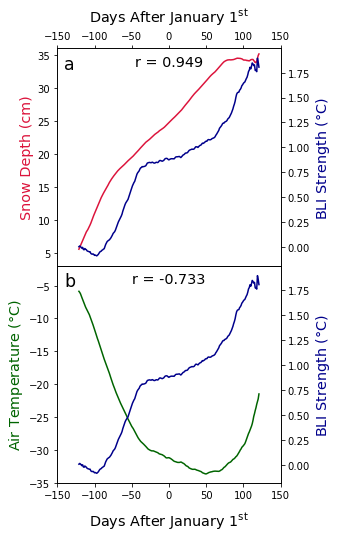

In [9]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4,8))

ax1.xaxis.set_label_position('top')
ax1.xaxis.tick_top()

ax1.plot(ranger, [rm_dict['stake_depth'][i] for i in ranger],color='crimson',label='Snow Depth')
ax1b = ax1.twinx()
ax1b.plot(ranger, [rm_dict['diff'][i] for i in ranger],color='darkblue')
lr = linregress([rm_dict['stake_depth'][i] for i in ranger],
                [rm_dict['diff'][i] for i in ranger])

ax1.set_ylabel('Snow Depth (cm)',color='crimson',fontsize='x-large')
ax1b.set_ylabel('BLI Strength ($\degree$C)',color='darkblue',fontsize='x-large')

rstring = f'r = {np.round(lr[2],3)}'

ax1.annotate(rstring,xy=(0.5,0.97),ha='center',va='top',xycoords='axes fraction',fontsize='x-large')

ax2.plot(ranger, [rm_dict['Air temperature'][i] for i in ranger],color='darkgreen',label='Air Temp')
ax2b = ax2.twinx()
ax2b.plot(ranger, [rm_dict['diff'][i] for i in ranger],color='darkblue')

lr = linregress([rm_dict['Air temperature'][i] for i in ranger],
                [rm_dict['diff'][i] for i in ranger])


ax2.set_ylabel('Air Temperature ($\degree$C)',color='darkgreen',fontsize='x-large')
ax2b.set_ylabel('BLI Strength ($\degree$C)',color='darkblue',fontsize='x-large')

rstring = f'r = {np.round(lr[2],3)}'
ax2.annotate(rstring,xy=(0.5,0.97),ha='center',va='top',xycoords='axes fraction',fontsize='x-large')


for ax,letter in zip([ax1,ax2],['a','b']):
    ax.set_xticks(np.arange(-150,151,50))
    ax.set_xlabel(r'Days After January 1$\mathregular{^{st}}$',fontsize='x-large',labelpad=10)
    ax.annotate(letter,xy=(0.03,0.97),va='top',xycoords='axes fraction',fontsize='xx-large')

ax1.set_ylim(3,36)
ax2.set_ylim(-35,-2)

fig.subplots_adjust(hspace=0)


plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Inversion/main_figs/run_means.png',
            dpi=400,
            bbox_inches='tight')